<a href="https://colab.research.google.com/github/mkbahk/DeepLearningwithKeras/blob/master/3_5_%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC_%EB%B6%84%EB%A5%98_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

로이터 데이타텟 로드하기






In [207]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [208]:
len(train_data)

8982

In [209]:
len(test_data)

2246

In [210]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [211]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [212]:
train_labels[10]

3

데이터 인코딩하기

In [213]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
# end of def

x_train = vectorize_sequences(train_data) #훈련데이타 벡터 변환
x_test = vectorize_sequences(test_data) #테스트 데이타 벡터 변환

In [214]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
# end of def

one_hot_train_labels = to_one_hot(train_labels) #훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) #테스트 레이블 벡터 변환

모델정의하기

In [215]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_56 (Dense)             (None, 46)                2990      
Total params: 725,550
Trainable params: 725,550
Non-trainable params: 0
_______________________________________________

모델 컴파일

In [216]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

검증 세트 준비하기

In [217]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

모델 훈련하기

In [218]:
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
result = model.evaluate(x=x_test, y=one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 71ms/step - loss: 2.4024 - accuracy: 0.4544 - val_loss: 1.6091 - val_accuracy: 0.5990
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4121 - accuracy: 0.6756 - val_loss: 1.5024 - val_accuracy: 0.6480
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.1327 - accuracy: 0.7196 - val_loss: 1.2349 - val_accuracy: 0.7110
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.9466 - accuracy: 0.7633 - val_loss: 1.1708 - val_accuracy: 0.7310
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.7648 - accuracy: 0.8051 - val_loss: 1.1222 - val_accuracy: 0.7630
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6347 - accuracy: 0.8282 - val_loss: 1.1603 - val_accuracy: 0.7400
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.4974 - accuracy: 0.8668 - val_loss: 1.2647 - val_accuracy: 0.7590
Epoch 8/20
16

CPU, GPU, TPU 사용시의 결과비교:

CPU:

Epoch 20/20
16/16 [==============================] - 1s 46ms/step - loss: 0.1315 - accuracy: 0.9550 - val_loss: 1.5239 - val_accuracy: 0.7670
71/71 [==============================] - 0s 3ms/step - loss: 1.8289 - accuracy: 0.7524

GPU:

Epoch 20/20
16/16 [==============================] - 0s 14ms/step - loss: 0.1678 - accuracy: 0.9422 - val_loss: 1.4124 - val_accuracy: 0.7930
71/71 [==============================] - 0s 3ms/step - loss: 1.7150 - accuracy: 0.7596

TPU:

Epoch 20/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1108 - accuracy: 0.9573 - val_loss: 1.4943 - val_accuracy: 0.7760
71/71 [==============================] - 0s 3ms/step - loss: 1.7421 - accuracy: 0.7609

훈련과 검증 손실

In [219]:
history.history

{'accuracy': [0.45439738035202026,
  0.6756451725959778,
  0.7196191549301147,
  0.7633424997329712,
  0.805061399936676,
  0.8282385468482971,
  0.8668253421783447,
  0.8937609791755676,
  0.9052869081497192,
  0.9347281455993652,
  0.9392383098602295,
  0.9408669471740723,
  0.9523928761482239,
  0.9530193209648132,
  0.9526434540748596,
  0.957028329372406,
  0.9446253776550293,
  0.9565271735191345,
  0.9589075446128845,
  0.954647958278656],
 'loss': [2.402430534362793,
  1.4120903015136719,
  1.13272225856781,
  0.9465584754943848,
  0.7648022770881653,
  0.6346705555915833,
  0.4973997473716736,
  0.407078355550766,
  0.3629268407821655,
  0.25670957565307617,
  0.22948001325130463,
  0.22914904356002808,
  0.16403646767139435,
  0.16723203659057617,
  0.14790646731853485,
  0.13264474272727966,
  0.16744263470172882,
  0.11845460534095764,
  0.11157197505235672,
  0.12766008079051971],
 'val_accuracy': [0.5989999771118164,
  0.6480000019073486,
  0.7110000252723694,
  0.7310000

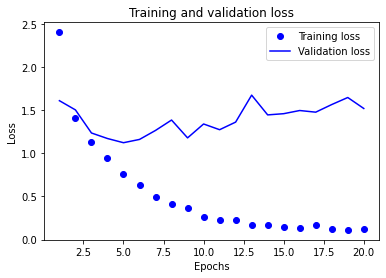

In [220]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') #'bo'는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss') #'b'는 파란색 실선을 의미합니다.

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


훈련 검증 정확도 그리기

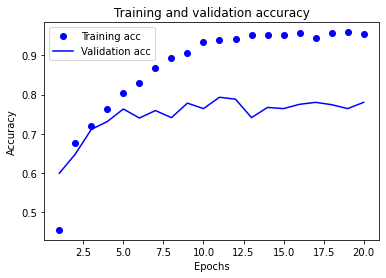

In [221]:
plt.clf() #그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

새로운 데이타로 예측하기

In [222]:
predictions =  model.predict(x_test)

In [223]:
predictions[0].shape

(46,)

In [224]:
np.sum(predictions[0])

1.0000001

In [225]:
np.argmax(predictions[0])

3